In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

from sklearn import preprocessing
from matplotlib.pyplot import figure
from pandas.api.types import is_numeric_dtype

plt.style.use('ggplot')

In [11]:

url = 'https://raw.githubusercontent.com/RusinDima12/BSR/main/data/data.csv'
url = 'https://gist.githubusercontent.com/RusinDima12/5340f58b67070324468a60b43a6b0ccb/raw/15060b5210dfce47080e28a82ddb55a9b11e345f/data'
df = pd.read_csv(url, index_col=0, sep = ';',decimal=',')
print(df.head(5))

      SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
AGE                                                                  
49.0    0       0.0        0.0        0.0       2.0       NaN  0.0   
65.0    0       0.0        1.0        2.0       1.0       NaN  2.0   
58.0    1       0.0        0.0        0.0       2.0       1.0  2.0   
43.0    1       4.0        2.0        2.0       2.0       NaN  0.0   
49.0    1       0.0        4.0        2.0       1.0       NaN  2.0   

      SIM_GIPERT  DLIT_AG  ZSN_A  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  \
AGE                               ...                                    
49.0         0.0      0.0    0.0  ...          0           0         0   
65.0         0.0      NaN    0.0  ...          0           0         0   
58.0         0.0      2.0    0.0  ...          0           0         0   
43.0         0.0      0.0    0.0  ...          0           0         0   
49.0         0.0      3.0    0.0  ...          0           0     

In [8]:
df = pd.read_csv('../data-test/data.csv', sep = ';',decimal=',')

ParserError: Error tokenizing data. C error: Expected 5 fields in line 1369, saw 6


In [7]:
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,49.0,0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,1,NaN,0,0.0,0.0
1,65.0,0,0.0,1.0,2.0,1.0,NaN,2.0,0.0,NaN,...,0,0,0,1,0,0,0.0,0,0.0,0.0
2,58.0,1,0.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0.0,0,0.0,0.0
3,43.0,1,4.0,2.0,2.0,2.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,0.0,0.0
4,49.0,1,0.0,4.0,2.0,1.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,0.0,0,0.0,0.0


In [100]:
len(df)

1700

<ipython-input-101-276dc16fb189>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(figsize=(5, 5))


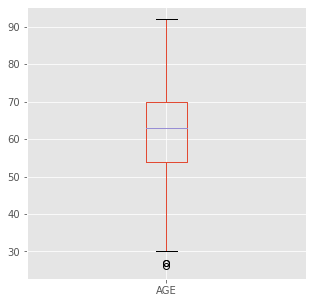

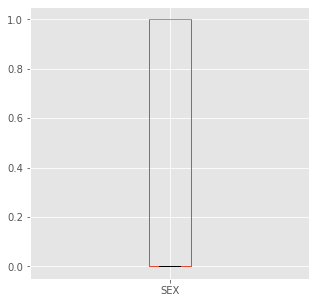

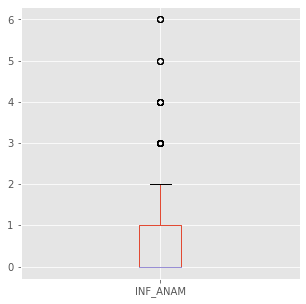

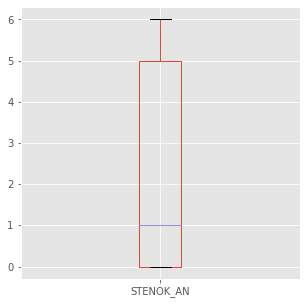

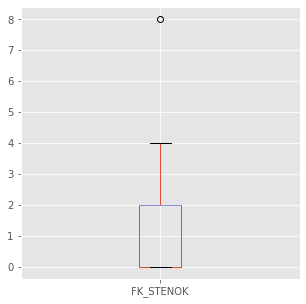

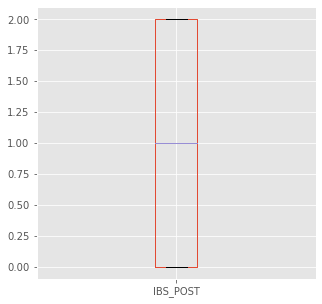

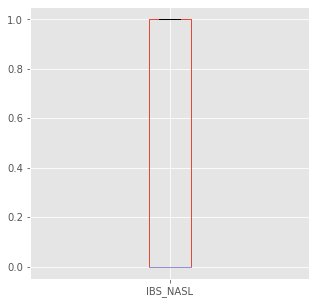

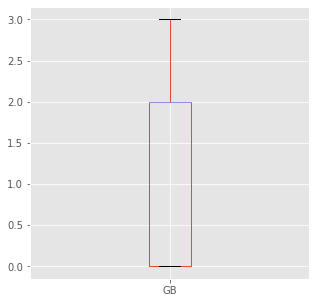

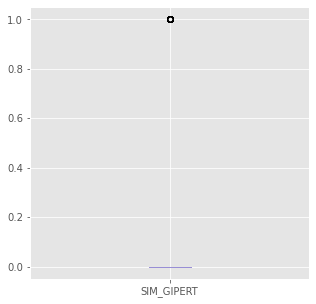

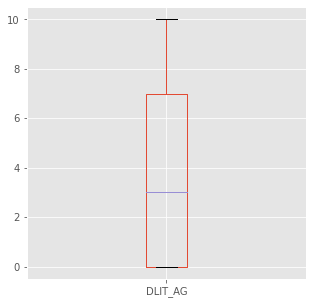

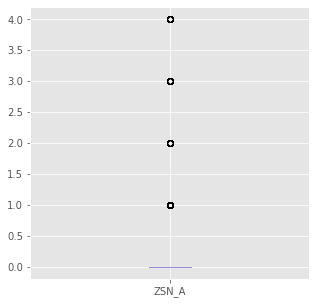

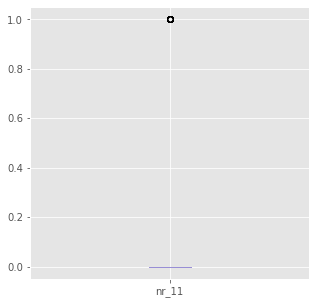

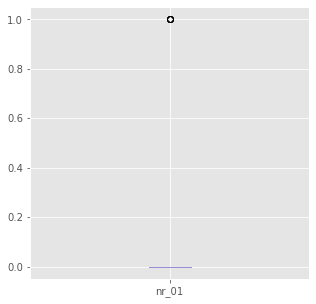

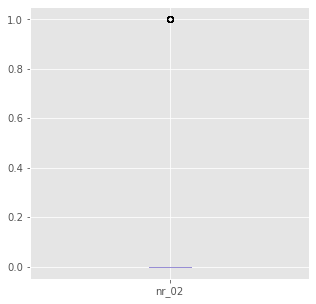

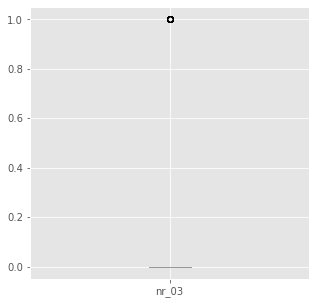

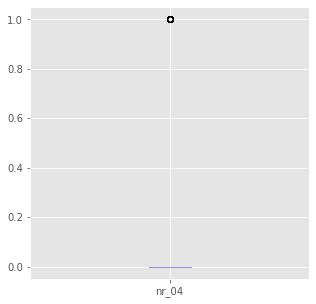

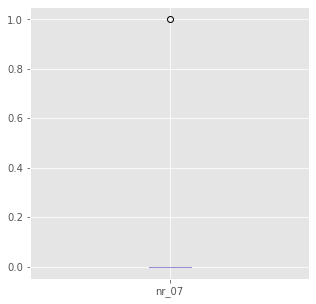

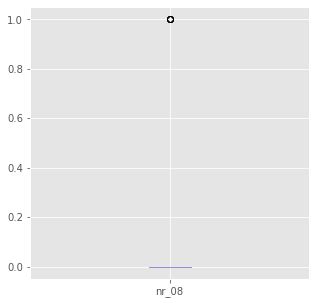

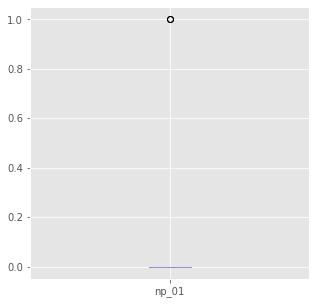

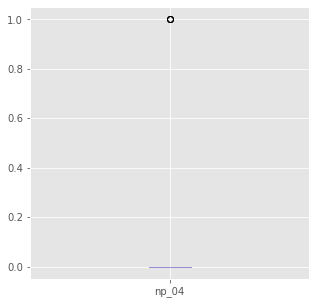

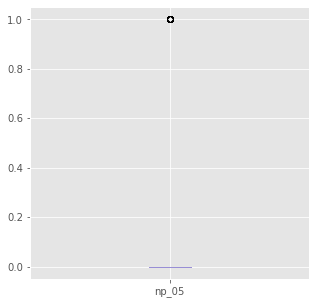

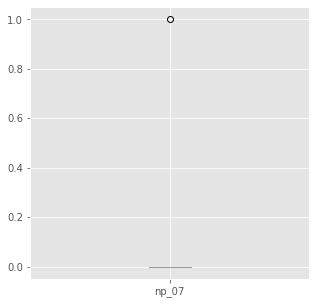

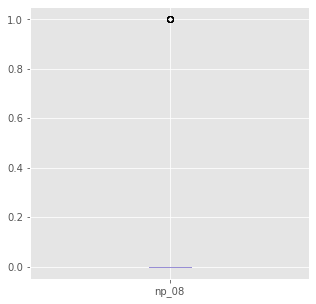

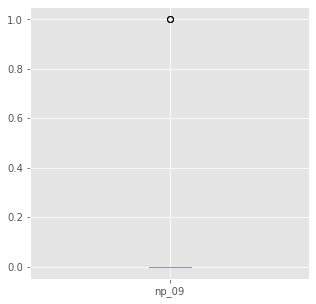

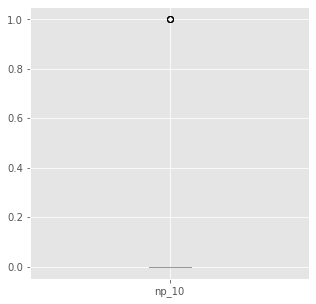

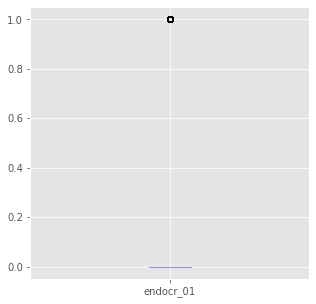

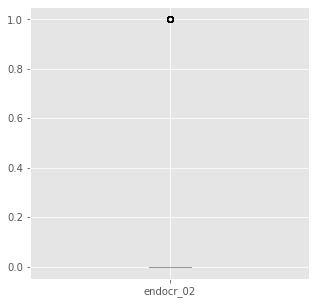

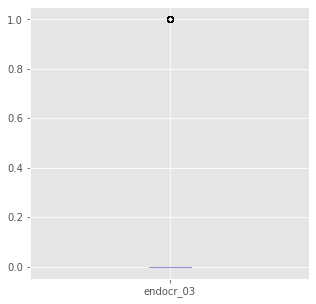

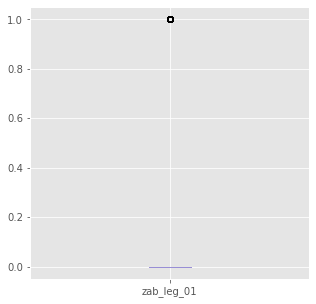

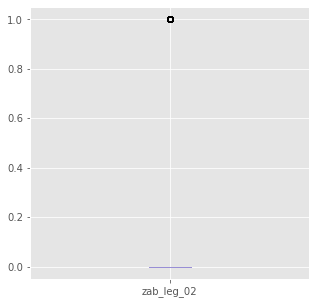

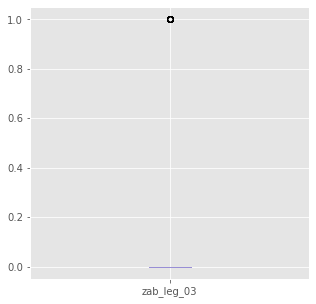

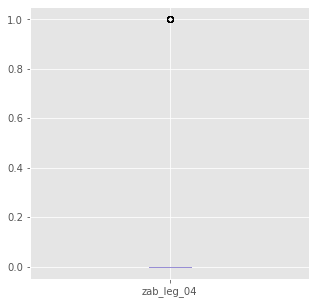

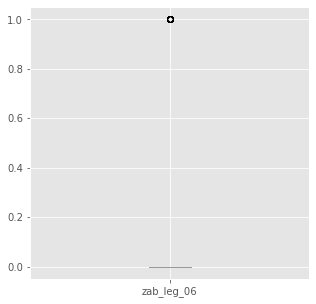

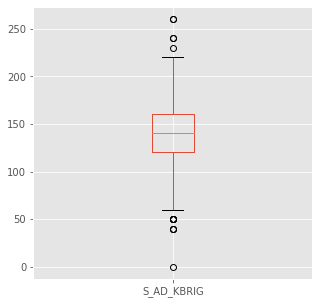

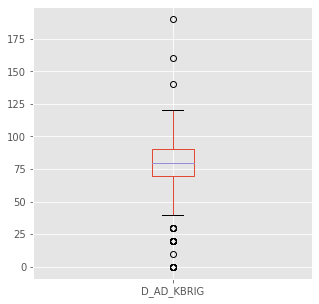

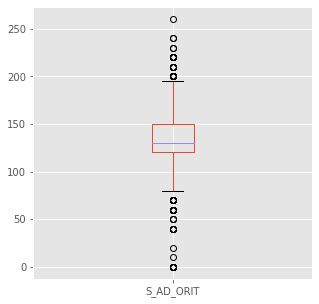

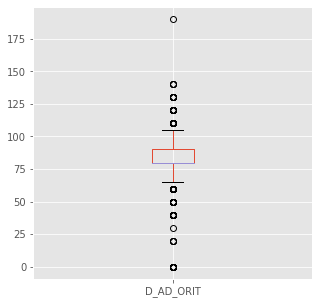

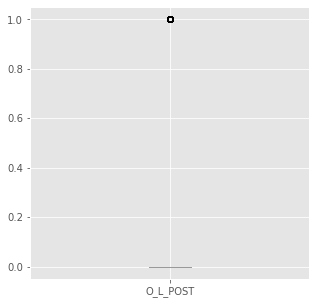

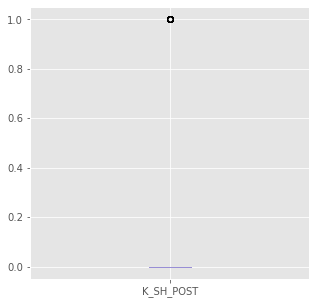

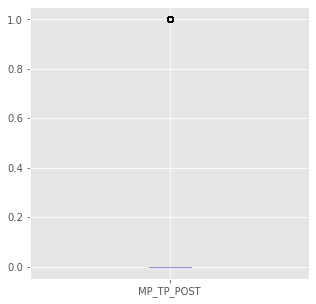

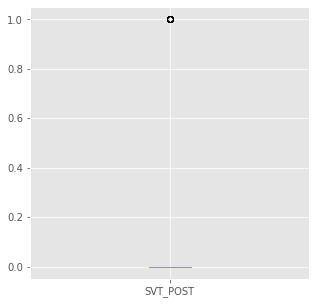

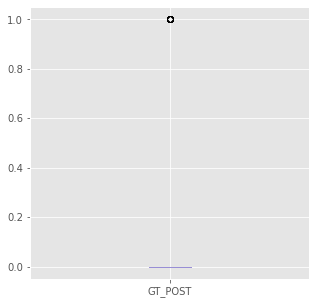

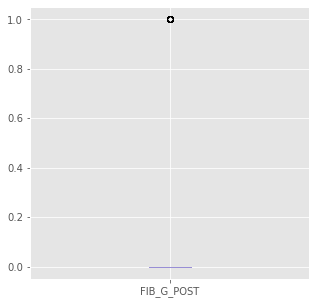

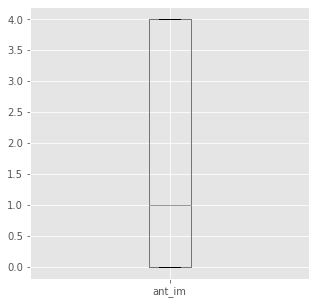

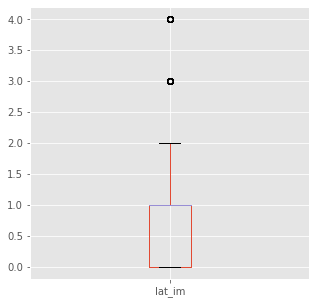

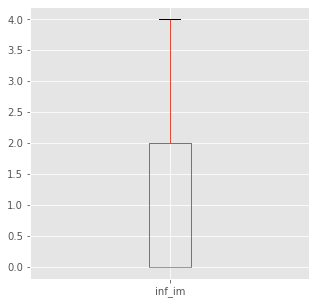

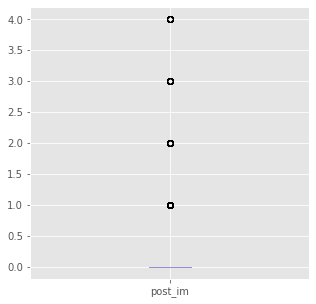

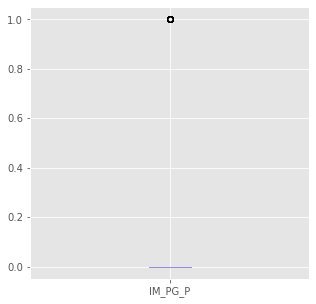

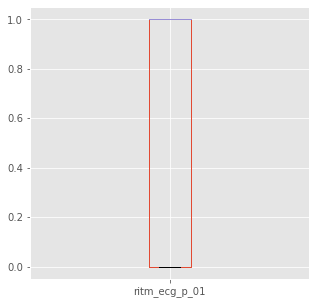

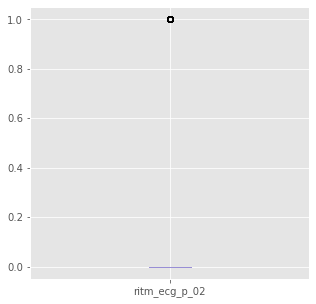

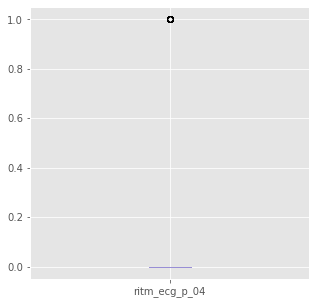

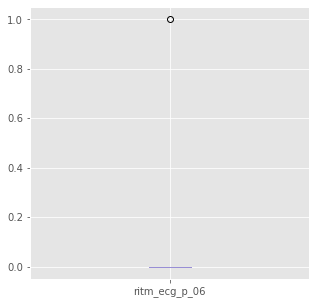

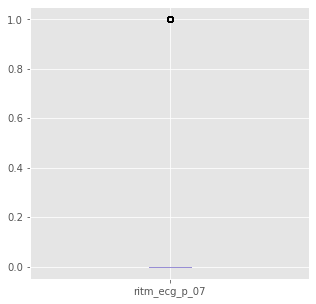

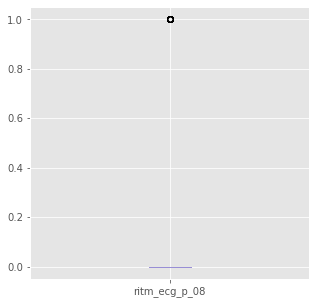

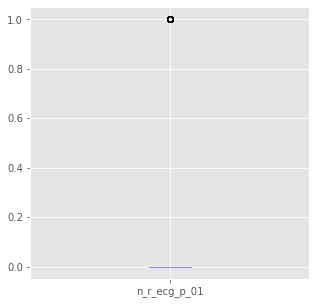

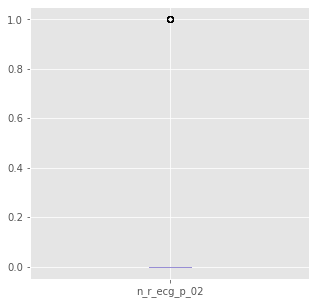

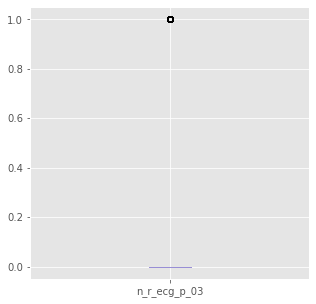

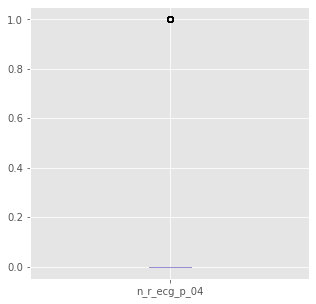

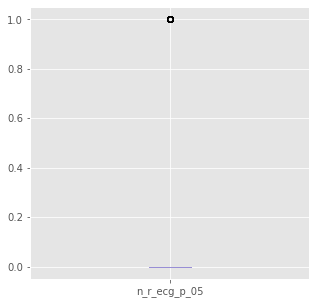

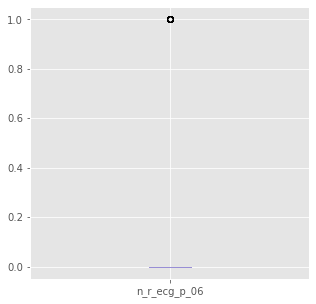

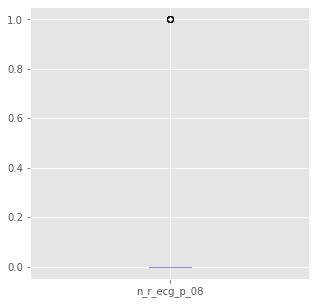

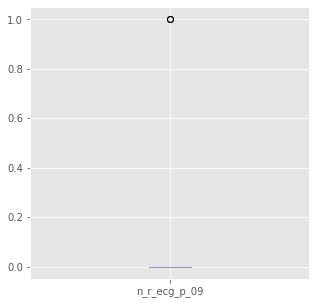

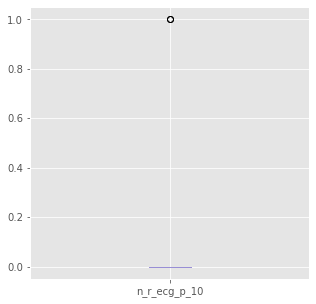

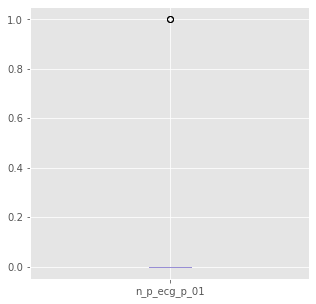

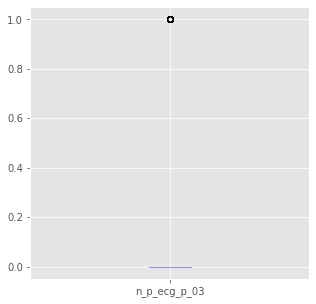

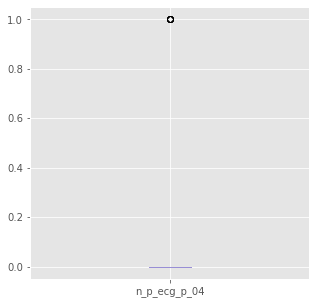

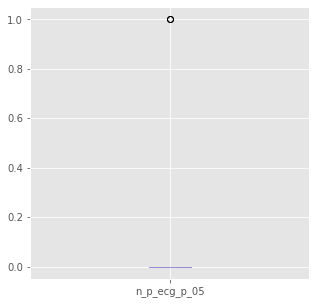

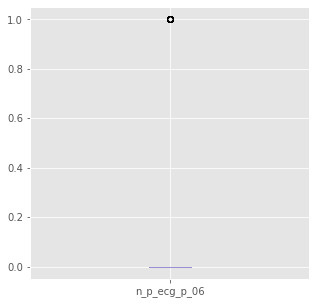

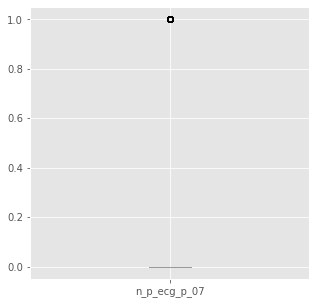

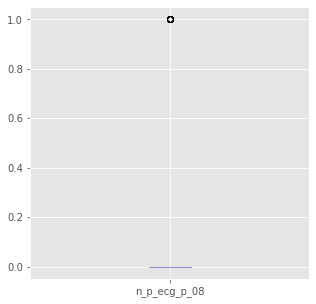

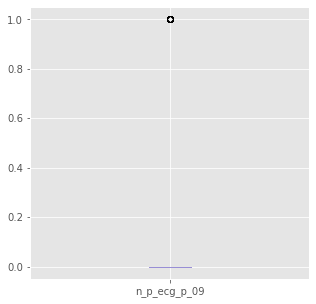

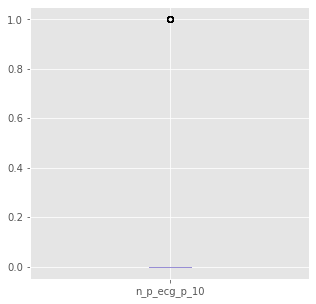

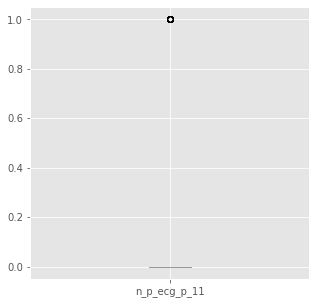

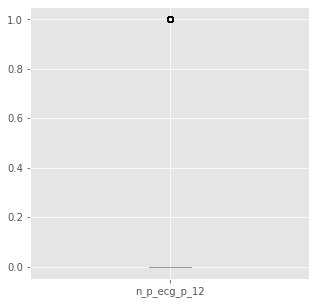

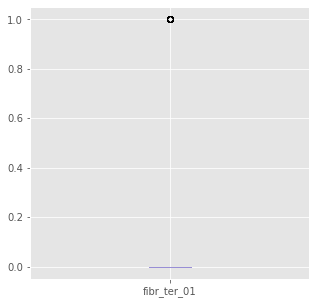

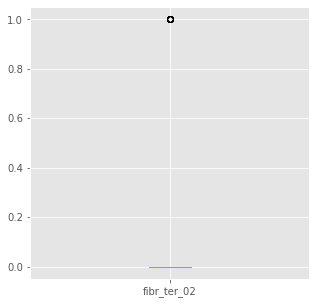

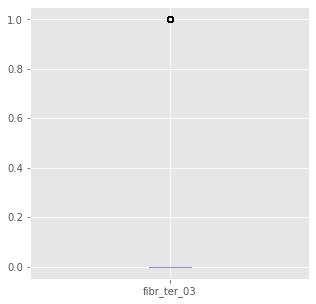

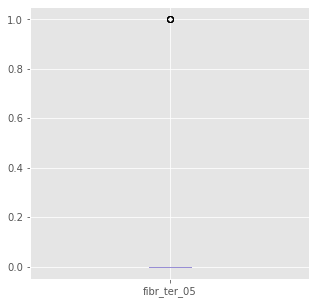

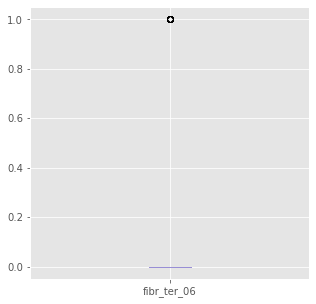

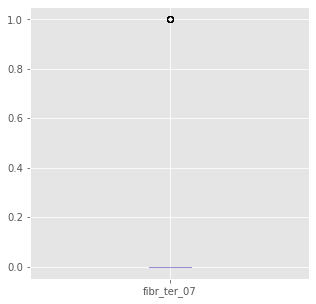

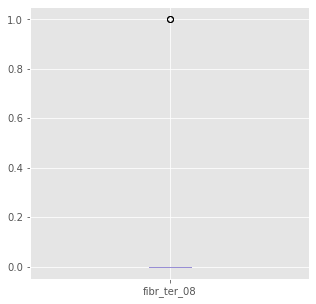

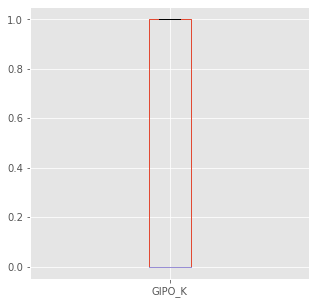

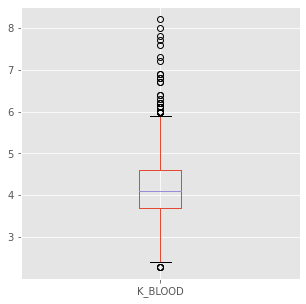

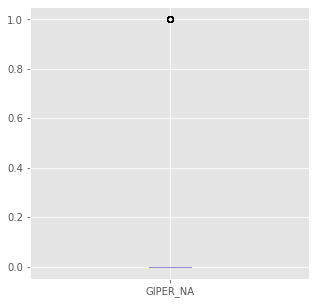

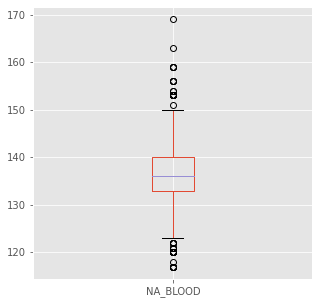

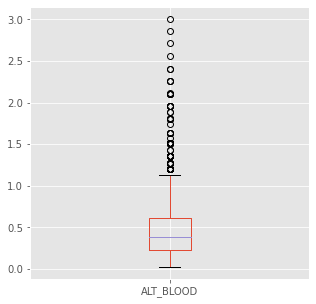

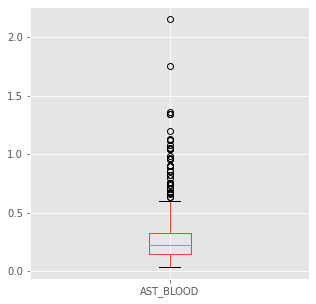

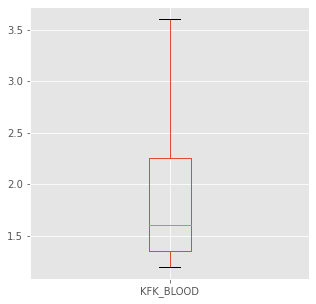

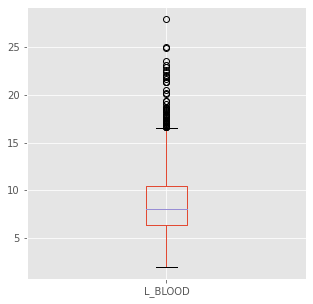

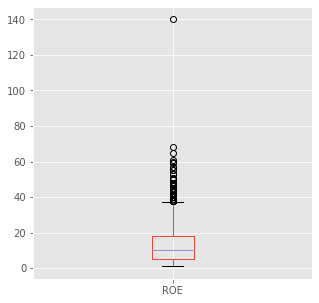

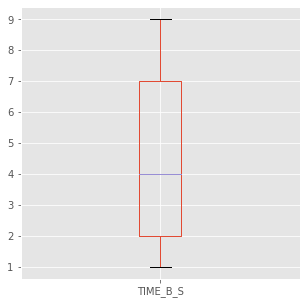

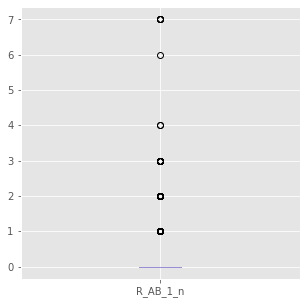

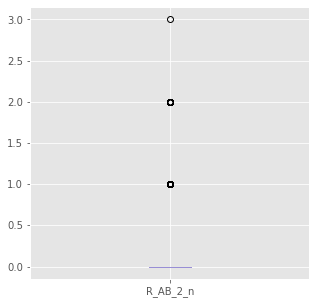

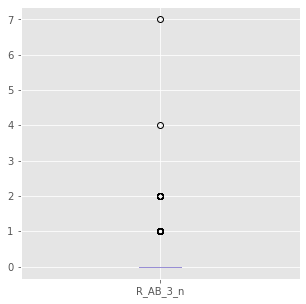

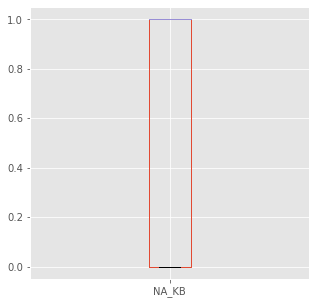

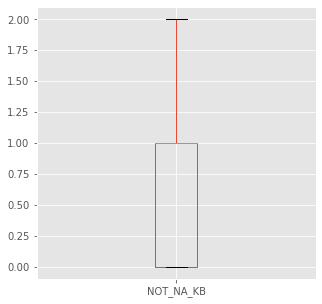

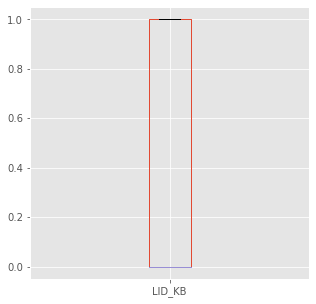

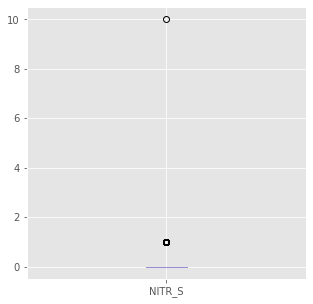

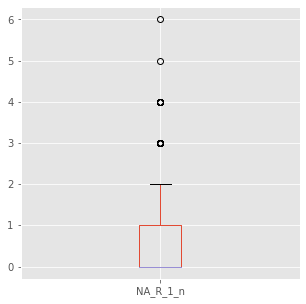

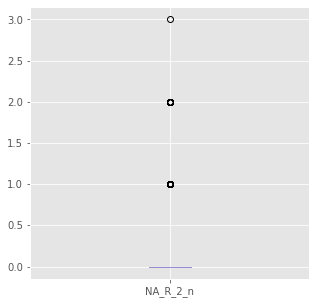

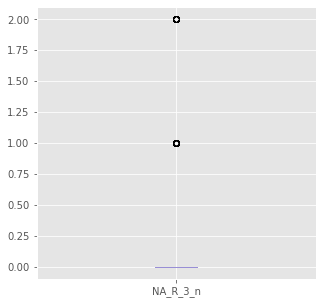

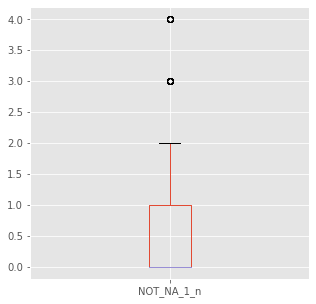

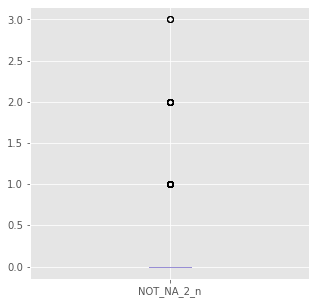

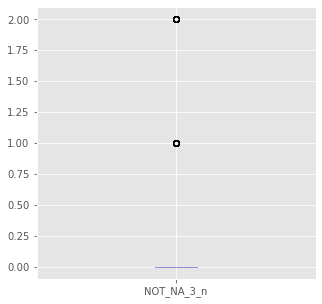

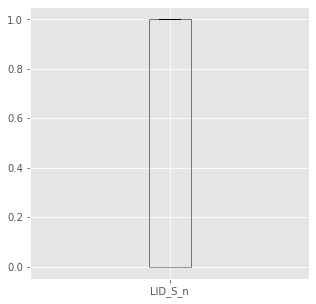

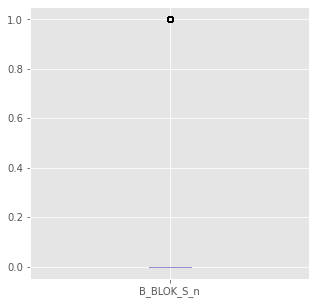

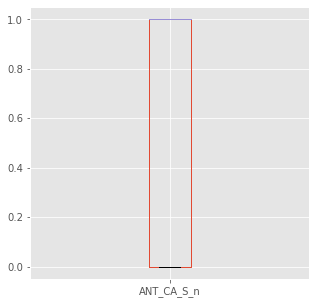

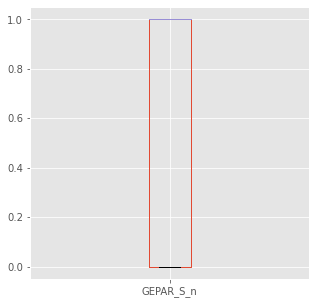

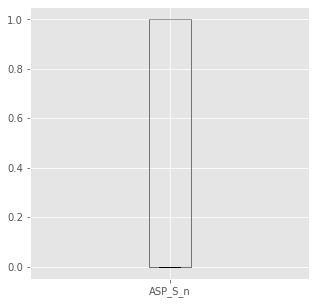

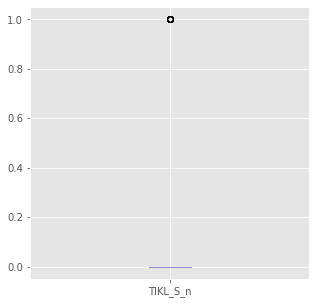

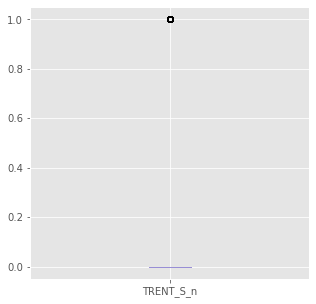

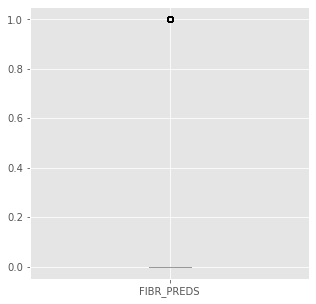

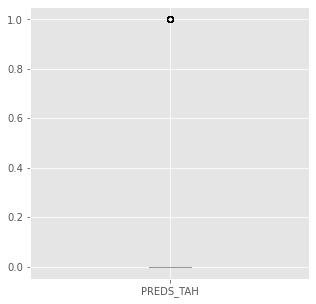

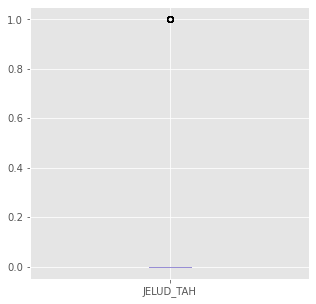

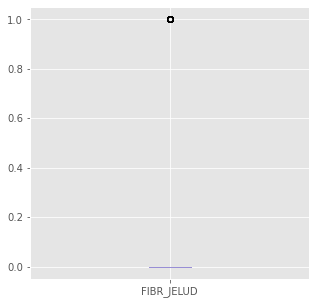

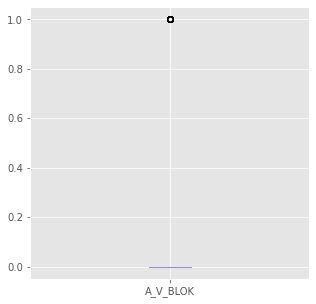

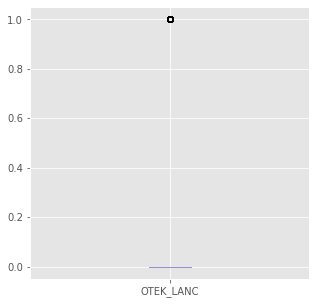

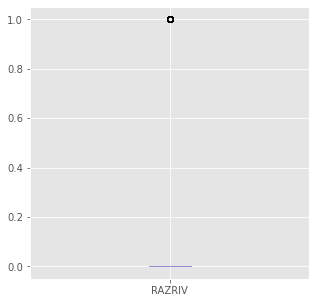

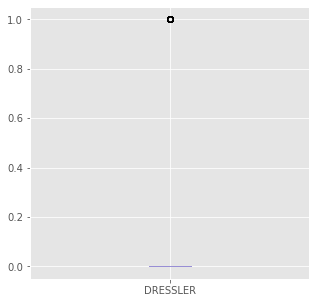

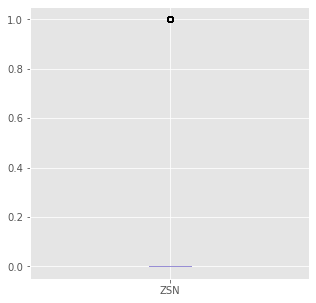

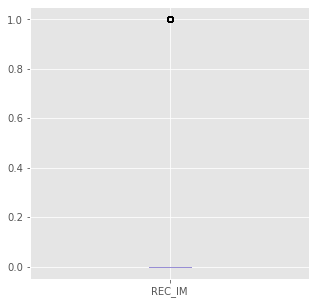

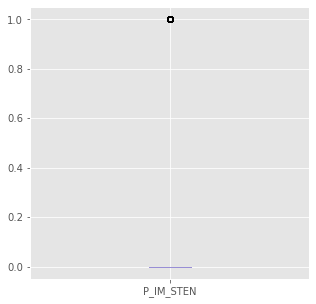

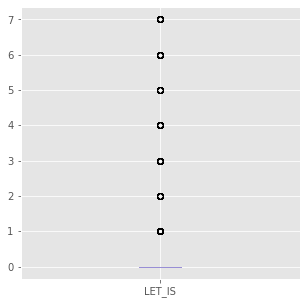

In [101]:
for column in df.columns:
    plt.subplots(figsize=(5, 5))
    #plt.subplot(8, 16, i)
    df.boxplot(column)

plt.show()

In [102]:
df = df.drop(df.loc[df['ROE'] > 130 ].index)

In [103]:
df.isnull().sum(axis = 0)

AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
FK_STENOK     73
            ... 
DRESSLER       0
ZSN           26
REC_IM         0
P_IM_STEN      1
LET_IS         2
Length: 123, dtype: int64

<AxesSubplot:>

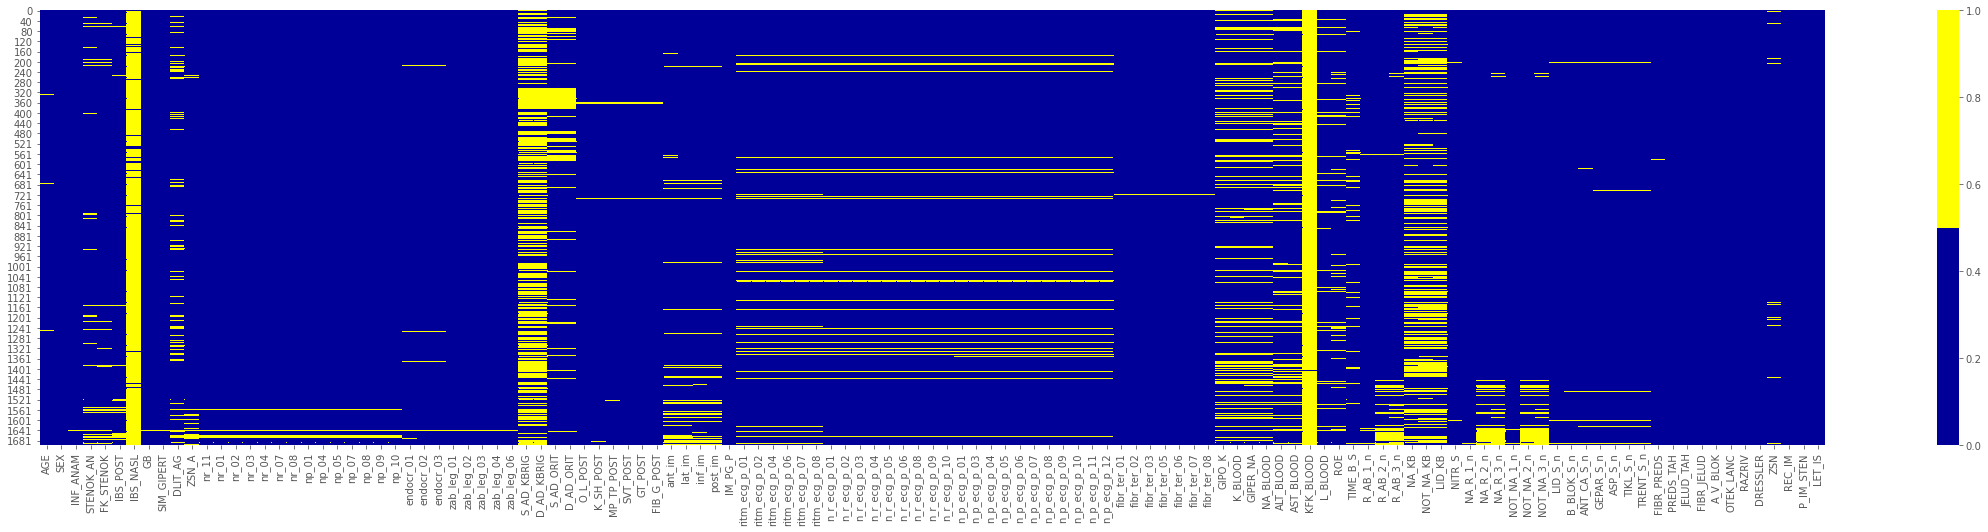

In [104]:
cols = df.columns 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
plt.figure(figsize=(40, 8))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [122]:
df_without_nan = df.copy()

In [106]:
def getAvgForStr(list_of_item):
    summ = 0
    coun = 0
    for i in list_of_item:
        if i != 'Nan':
            summ += float(i)
            count += 1
    return str(summ/count)

In [123]:
for column in df_without_nan.columns:
    if df_without_nan[column].isnull().sum()>len(df)*0.3:
        print(column,df_without_nan[column].isnull().sum())

IBS_NASL 1627
S_AD_KBRIG 1069
D_AD_KBRIG 1069
KFK_BLOOD 1695
NA_KB 657
NOT_NA_KB 686
LID_KB 677


In [124]:
for column in df_without_nan.columns:
    if df_without_nan[column].isnull().sum()>len(df)*0.3:
        del df_without_nan[column] #Удаляем столбцы где Nan более 30%
    else:
        # Ставим среднее во всех остальных случаях
        if is_numeric_dtype(df_without_nan[column]):
            avg_for_nan = int(df_without_nan[column].mean())
            df_without_nan[column] = df_without_nan[column].fillna(avg_for_nan)
        else:
            df_without_nan[column] = df_without_nan[column].fillna(getAvgForStr(df_without_nan[column].tolist()))

In [125]:
#Меняем тип со string to float и если число целое то с float to int
for column in df_without_nan.columns:
    data = df_without_nan[column].fillna(0)
    print(column, end=': ')
    if df_without_nan[column].dtype == 'object':
        df_without_nan[column] = df_without_nan[column].astype('float')
        print('str')
    elif (data.astype(int) == data).all():
        df_without_nan[column] = df_without_nan[column].astype('int')
        print('int')
    else:
        print('float')

AGE: int
SEX: int
INF_ANAM: int
STENOK_AN: int
FK_STENOK: int
IBS_POST: int
GB: int
SIM_GIPERT: int
DLIT_AG: int
ZSN_A: int
nr_11: int
nr_01: int
nr_02: int
nr_03: int
nr_04: int
nr_07: int
nr_08: int
np_01: int
np_04: int
np_05: int
np_07: int
np_08: int
np_09: int
np_10: int
endocr_01: int
endocr_02: int
endocr_03: int
zab_leg_01: int
zab_leg_02: int
zab_leg_03: int
zab_leg_04: int
zab_leg_06: int
S_AD_ORIT: int
D_AD_ORIT: int
O_L_POST: int
K_SH_POST: int
MP_TP_POST: int
SVT_POST: int
GT_POST: int
FIB_G_POST: int
ant_im: int
lat_im: int
inf_im: int
post_im: int
IM_PG_P: int
ritm_ecg_p_01: int
ritm_ecg_p_02: int
ritm_ecg_p_04: int
ritm_ecg_p_06: int
ritm_ecg_p_07: int
ritm_ecg_p_08: int
n_r_ecg_p_01: int
n_r_ecg_p_02: int
n_r_ecg_p_03: int
n_r_ecg_p_04: int
n_r_ecg_p_05: int
n_r_ecg_p_06: int
n_r_ecg_p_08: int
n_r_ecg_p_09: int
n_r_ecg_p_10: int
n_p_ecg_p_01: int
n_p_ecg_p_03: int
n_p_ecg_p_04: int
n_p_ecg_p_05: int
n_p_ecg_p_06: int
n_p_ecg_p_07: int
n_p_ecg_p_08: int
n_p_ecg_p_09: i

In [126]:
#Ищем неинформативные столбцы
num_rows = len(df_without_nan.index)
low_information_cols = [] #

for col in df_without_nan.columns:
    cnts = df_without_nan[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

SIM_GIPERT: 96.64509%
0    1642
1      57
Name: SIM_GIPERT, dtype: int64

nr_11: 97.52796%
0    1657
1      42
Name: nr_11, dtype: int64

nr_01: 99.76457%
0    1695
1       4
Name: nr_01, dtype: int64

nr_02: 98.88170%
0    1680
1      19
Name: nr_02, dtype: int64

nr_03: 97.93996%
0    1664
1      35
Name: nr_03, dtype: int64

nr_04: 98.29311%
0    1670
1      29
Name: nr_04, dtype: int64

nr_07: 99.94114%
0    1698
1       1
Name: nr_07, dtype: int64

nr_08: 99.76457%
0    1695
1       4
Name: nr_08, dtype: int64

np_01: 99.88228%
0    1697
1       2
Name: np_01, dtype: int64

np_04: 99.82343%
0    1696
1       3
Name: np_04, dtype: int64

np_05: 99.35256%
0    1688
1      11
Name: np_05, dtype: int64

np_07: 99.94114%
0    1698
1       1
Name: np_07, dtype: int64

np_08: 99.64685%
0    1693
1       6
Name: np_08, dtype: int64

np_09: 99.88228%
0    1697
1       2
Name: np_09, dtype: int64

np_10: 99.82343%
0    1696
1       3
Name: np_10, dtype: int64

endocr_02: 97.52796%
0    1657

In [115]:
df_without_nan.drop(low_information_cols, axis=1, inplace=True) #Возможно не нужно

In [127]:
# отбрасываем неуникальные строки
df_dedupped = df_without_nan.drop_duplicates()

# сравниваем формы старого и нового наборов
print(df_without_nan.shape)
print(df_dedupped.shape)

(1699, 116)
(1699, 116)


In [128]:
normalized_df = df_without_nan.copy()
for column in normalized_df.columns:
    normalized_df[column] =(normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min()) 
    

In [129]:
normalized_df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0.348485,0.0,0.000000,0.000000,0.000,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
1,0.590909,0.0,0.000000,0.166667,0.250,0.5,0.666667,0.0,0.3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.484848,1.0,0.000000,0.000000,0.000,1.0,0.666667,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.257576,1.0,0.666667,0.333333,0.250,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.348485,1.0,0.000000,0.666667,0.250,0.5,0.666667,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.545455,1.0,0.000000,0.000000,0.000,0.0,0.000000,1.0,0.7,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.428571
1696,0.666667,0.0,0.000000,0.333333,0.250,0.5,0.666667,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.428571
1697,0.666667,0.0,0.000000,1.000000,0.250,0.5,0.666667,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
1698,0.803030,0.0,0.333333,0.333333,0.250,0.5,0.666667,0.0,0.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.142857


In [130]:
df_target = df_without_nan.iloc[:,[104,105,106,107,108,109,110,111,112,113,114,115]].copy()
df_target['DEATH'] = df_target['LET_IS'].apply(lambda x: 1 if x > 0 else 0)
df_target

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS,DEATH
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0,0,0,0,0,1,0,0,0,0,3,1
1696,0,0,0,0,0,0,1,0,0,0,0,3,1
1697,0,0,0,0,0,0,0,0,0,0,0,1,1
1698,0,0,0,0,0,1,0,0,0,0,0,1,1


In [131]:
df_without_nan

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,49,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,65,0,0,1,2,1,2,0,3,0,...,0,0,0,1,0,0,0,0,0,0
2,58,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,43,1,4,2,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,1,0,4,2,1,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,62,1,0,0,0,0,0,1,7,0,...,0,0,0,0,1,0,0,0,0,3
1696,70,0,0,2,2,1,2,0,7,0,...,0,0,0,0,1,0,0,0,0,3
1697,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [132]:
def_df = df_without_nan.iloc[:,[87,88,89,91,92,93,94,95,96]]
def_df.columns

Index(['R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n',
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n'],
      dtype='object')

In [133]:
df_zero_day = df_without_nan.copy()

In [134]:
df_zero_day.drop(def_df.columns ,axis=1 ,inplace=True)

In [135]:
df_first_day = df_without_nan.copy()
def_df_first = df_without_nan.iloc[:,[88,89,92,93,95,96]]
def_df_first.columns

Index(['R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n',
       'NOT_NA_3_n'],
      dtype='object')

In [136]:
df_first_day.drop(def_df_first.columns ,axis=1 ,inplace=True)

In [137]:
df_second_day = df_without_nan.copy()
def_df_second = df_without_nan.iloc[:,[89,93,96]]
def_df_second.columns

Index(['R_AB_3_n', 'NA_R_3_n', 'NOT_NA_3_n'], dtype='object')

In [138]:
df_second_day.drop(def_df_second.columns ,axis=1 ,inplace=True)

In [139]:
df_third_day = df_without_nan.copy()

In [140]:
df_zero_day.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,...,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,61.850500,0.626251,0.570924,2.297822,1.199529,1.155386,1.391995,0.033549,3.294879,0.188346,...,0.024720,0.041789,0.033549,0.093584,0.031783,0.044144,0.231901,0.093584,0.087110,0.477340
std,11.236405,0.483941,0.904837,2.364503,1.029986,0.789723,1.086086,0.180119,2.869693,0.649240,...,0.155317,0.200166,0.180119,0.291335,0.175475,0.205475,0.422170,0.291335,0.282079,1.382176
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,6.000000,6.000000,8.000000,2.000000,3.000000,1.000000,10.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [141]:
df_first_day.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,...,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,61.850500,0.626251,0.570924,2.297822,1.199529,1.155386,1.391995,0.033549,3.294879,0.188346,...,0.024720,0.041789,0.033549,0.093584,0.031783,0.044144,0.231901,0.093584,0.087110,0.477340
std,11.236405,0.483941,0.904837,2.364503,1.029986,0.789723,1.086086,0.180119,2.869693,0.649240,...,0.155317,0.200166,0.180119,0.291335,0.175475,0.205475,0.422170,0.291335,0.282079,1.382176
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,6.000000,6.000000,8.000000,2.000000,3.000000,1.000000,10.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [142]:
df_second_day.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,...,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,61.850500,0.626251,0.570924,2.297822,1.199529,1.155386,1.391995,0.033549,3.294879,0.188346,...,0.024720,0.041789,0.033549,0.093584,0.031783,0.044144,0.231901,0.093584,0.087110,0.477340
std,11.236405,0.483941,0.904837,2.364503,1.029986,0.789723,1.086086,0.180119,2.869693,0.649240,...,0.155317,0.200166,0.180119,0.291335,0.175475,0.205475,0.422170,0.291335,0.282079,1.382176
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,6.000000,6.000000,8.000000,2.000000,3.000000,1.000000,10.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [143]:
df_third_day.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,...,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,61.850500,0.626251,0.570924,2.297822,1.199529,1.155386,1.391995,0.033549,3.294879,0.188346,...,0.024720,0.041789,0.033549,0.093584,0.031783,0.044144,0.231901,0.093584,0.087110,0.477340
std,11.236405,0.483941,0.904837,2.364503,1.029986,0.789723,1.086086,0.180119,2.869693,0.649240,...,0.155317,0.200166,0.180119,0.291335,0.175475,0.205475,0.422170,0.291335,0.282079,1.382176
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,6.000000,6.000000,8.000000,2.000000,3.000000,1.000000,10.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
